## Data Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Read in data for second innings
it20_data = pd.read_csv('ball_by_ball_it20.csv')
innings1 = it20_data.loc[it20_data['Innings'] == 1]

# Drop the last row for each innings as the resultant score is known
innings1 = innings1.drop(innings1[innings1['Balls Remaining'] == 0].index)
innings1.reset_index(drop=True, inplace=True)

print('No of Matches: ', innings1['Match ID'].nunique())
print('Data Frame Length: ', len(innings1.index))

innings1.head()


/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_58085/886121466.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  it20_data = pd.read_csv('ball_by_ball_it20.csv')


No of Matches:  1582
Data Frame Length:  192145


,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded
0,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,1,1,1,HG Munsey,KJ Coetzer,GH O'Brien,0,0,0,0,[],0,NaN,NaN,0,0,205,NaN,119,Scotland,0,0,0,1,0,NaN,NaN,0
1,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,1,1,2,HG Munsey,KJ Coetzer,GH O'Brien,0,0,0,0,[],0,NaN,NaN,0,0,205,NaN,118,Scotland,0,0,0,2,0,NaN,NaN,0
2,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,1,1,3,HG Munsey,KJ Coetzer,GH O'Brien,1,0,1,0,[],0,NaN,NaN,1,0,205,NaN,117,Scotland,0,1,0,3,0,NaN,NaN,1
3,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,1,1,4,KJ Coetzer,HG Munsey,GH O'Brien,0,1,1,1,['wides'],0,NaN,NaN,2,0,205,NaN,117,Scotland,0,0,1,0,3,NaN,NaN,1
4,1199528,2019-10-24,Dubai International Cricket Stadium,Scotland,Bermuda,1,1,4,KJ Coetzer,HG Munsey,GH O'Brien,0,0,0,0,[],0,NaN,NaN,2,0,205,NaN,116,Scotland,0,0,1,2,3,NaN,NaN,0


The features are selected as the running match statistics that might hame some bearing on the number of runs the team gets. We need to add a row for each first innings representing the values of each fetaure before the first ball has been bowled. We subtract 1 from every value in the 'Target Score' column since the actual number of runs score by the team batting first is 1 less than the target score, and we are interested in predicting the number of runs scored.

## Data Pre-processing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the features of the model
features = ['Innings Runs', 'Innings Wickets', 'Balls Remaining', 'Total Batter Runs','Total Non Striker Runs','Batter Balls Faced','Non Striker Balls Faced', 'Runs From Ball']


# Step 2: Set the cutoff date
cutoff_date = '2018-01-01'

# Step 3: Split the data into training and test sets based on the cutoff date
train_data = innings1[innings1['Date'] < cutoff_date]
test_data = innings1[innings1['Date'] >= cutoff_date]


# Step 4: Select the relevant features for X and the target variable for y
X_train = train_data[features]
y_train = train_data['Target Score']
X_test = test_data[features]
y_test = test_data['Target Score']



# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression object
reg = LinearRegression()

# Fit the model using the X and y data
reg.fit(X_train, y_train)


# Print the coefficients and intercept of the fitted model
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# Make predictions using the fitted model
y_pred = reg.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Compute the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared
print('Mean squared error:', mse)
print('Coefficient of determination (R-squared):', r2)

Coefficients: [ 43.18078475 -12.95257606  28.48199759   3.140428     2.93691617
  -2.94218484  -2.76006423   0.30026084]
Intercept: 152.73300536015861
Mean squared error: 716.1499525890813
Coefficient of determination (R-squared): 0.5351360625639565


In [23]:
x = np.array([122, 4, 25, 1, 42, 1, 27, 0])
x = scaler.transform(x.reshape(1, -1))
print(reg.predict(x))

[160.88537662]


/Users/jamiewelsh/opt/anaconda3/envs/deep/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The linear regression model gives rise to a mean squared error of 716, which initially seems quite poor given the task at hand. However, the model is trained and evaluated on data from every ball of an innings and as a result, many predictions being made have very little information to go off. Human prediction of a first innings score at the start of the innings is near impossible as there is little knowledge of what the batting/bowling conditions are like other than the weather and the look of the pitch (things that our model is not sophisticated enough to account for). Furthermore, human prediction will likely be based on the standard of the teams playing which is known to viewers and analysts alike but not to our game statistic based model. This is a drawback of modelling with our feature set. It only takes into account the scoreboard and not the standard of each team playing and the conditions. While this may effective for games between closely matched teams which are harder to predict, it is a clear drawback here. Poor predcitons near the start of the innings are likely worsenening performance and it is likely that the model makes better predictions when there is more context, i.e., towards the middle and end of the innings. Below, the coefficients of the linear regression model are plotted and it evident that current number of runs and number of balls remaining are the most important factor for prediting the score that the team batting first will set.

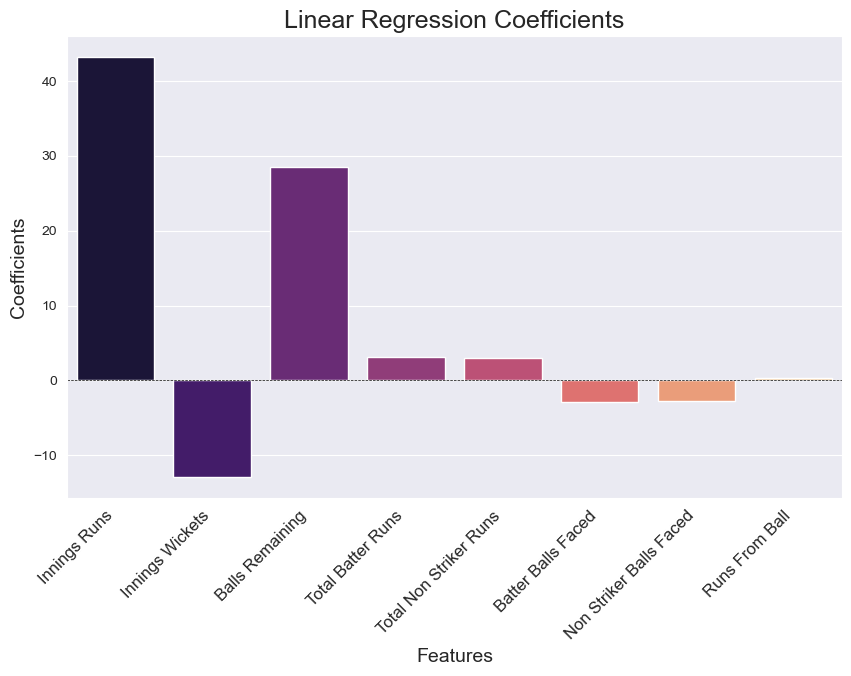

In [27]:
# Create a Seaborn barplot
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=features, y=reg.coef_, ax=ax, palette='magma')

# Set plot title and axis labels
ax.set_title('Linear Regression Coefficients', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Coefficients', fontsize=14)

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Add a horizontal line at y=0 for reference
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

Linear regression is a simple predictor as it only considers linear relationships between the features and the target. Furthermore, many pairs of features exhibit medium to high levels of correlation, which is not desirable for a linear regression model. With these deficiencies in mind, we try some more advanced machine learning methods below with the hope that this improves predictive performance.

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor


sweep_estimators = [50, 100, 200, 500]
for n_trees in sweep_estimators:
    # Random Forest Regression
    rf = RandomForestRegressor(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    rf_predictions = rf.predict(X_test)
    # Evaluate on the MSE and R2
    MSE = mean_squared_error(y_test, rf_predictions)
    r2 = r2_score(y_test, rf_predictions)
    print('Number of Trees: {}'.format(n_trees))
    print('Mean Squared Error: {}'.format(MSE))
    print('R2 Score: {}'.format(r2))


Number of Trees: 50
Mean Squared Error: 838.0903383972359
R2 Score: 0.45598268459567703
Number of Trees: 100
Mean Squared Error: 831.9112295086484
R2 Score: 0.4599936391135264
Number of Trees: 200
Mean Squared Error: 828.7938860431477
R2 Score: 0.46201715465307813
Number of Trees: 500
Mean Squared Error: 827.0532668006917
R2 Score: 0.4631470173469172


The best number of trees for the random forest classifier out of the values considered is 500. Regardless of the number of trees, the mean squared error is significantly higher than for linear regression and the $R^2$ score is consdierably lower as well. Hnece, linear regression performs better for this task than a random forest regressor. Below, we try XGBoost regression.

## XGBoost Regression

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost regression model
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Create a grid search object using 5-fold cross validation
grid_search = GridSearchCV(estimator = xgb_reg, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)


# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean cross-validated score
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean cross-validated score:', grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  15.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  15.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  15.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  15.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  12.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=  31.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=  32.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=  32.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=  31.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=  21.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=  21.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_est

The grid search has returned the best hyperparameter combination and the XGBoost regression model corresponding to this combination is re-trained below.

In [32]:
# Define XGBoost model parameters
params = {
    'objective': 'reg:squarederror',  # regression task with mean squared error loss
    'eval_metric': 'rmse',  # root mean squared error as evaluation metric
    'learning_rate': 0.1,  # step size shrinkage used in update to prevents overfitting
    'max_depth': 3,  # maximum depth of a tree
    'n_estimators': 500 # number of trees to fit
}

# Create XGBoost model object
xgb_reg = xgb.XGBRegressor(**params)

# Fit the model to training data
xgb_reg.fit(X_train, y_train)


# Make predictions on validation data using fitted model
y_pred = xgb_reg.predict(X_test)

# Evaluate on the MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: {}'.format(mse))
print('R2 Score: {}'.format(r2))

Mean Squared Error: 714.2156671426413
R2 Score: 0.5363916369663655


The optimised XGBoost regression model leads to a very slightly smaller MSE than the linear regression model. Both of these models far outperform random forests.

 There is a considerable level of variance that can be explained by the model and there will always be unexplained varaince in sporting data of this type. However, we cannot conclude strong predictive performance on the basis of an $R^2$ score of 0.54. In order to try and narrow down the model in order to improve predictive performance, we split the data into three sections based on the three main periods of a T20 innings; the powerplay, the middle overs, and the final overs. A random forest regressor is trained on each of these sets of data and evaluated by the MSE and $R^2$ score as before.

In [34]:
df = innings1
phases = ['Powerplay', 'Middle Overs', 'Final Overs']
for i, phase in enumerate(phases):
    print('Phase of Play: ', phase)
    if i == 0:
        # Slice the data frame for each phase of play
        data = df[df['Balls Remaining'] > 84]
        
    elif i == 1:
        data = df[df['Balls Remaining'] > 30]
        data = df[df['Balls Remaining'] <= 84]
    else:
        data = df[df['Balls Remaining'] <= 30]


    # Define the features of the model
    features = ['Innings Runs', 'Innings Wickets', 'Balls Remaining', 'Total Batter Runs','Total Non Striker Runs','Batter Balls Faced','Non Striker Balls Faced', 'Runs From Ball']


    # Step 2: Set the cutoff date
    cutoff_date = '2018-01-01'

    # Step 3: Split the data into training and test sets based on the cutoff date
    train_data = data[data['Date'] < cutoff_date]
    test_data = data[data['Date'] >= cutoff_date]


    # Step 4: Select the relevant features for X and the target variable for y
    X_train = train_data[features]
    y_train = train_data['Target Score']
    X_test = test_data[features]
    y_test = test_data['Target Score']



    # Step 5: Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create XGBoost model object
    xgb_reg = xgb.XGBRegressor(**params)

    # Fit the model to training data
    xgb_reg.fit(X_train, y_train)


    # Make predictions on validation data using fitted model
    y_pred = xgb_reg.predict(X_test)

    

    # Evaluate on the MSE and R2
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Mean Squared Error: {}'.format(MSE))
    print('R2 Score: {}'.format(r2))
    print()

   
    
    

    

Phase of Play:  Powerplay
Mean Squared Error: 1343.4891559591892
R2 Score: 0.1657921390284528

Phase of Play:  Middle Overs
Mean Squared Error: 458.5937145211001
R2 Score: 0.6961448819192311

Phase of Play:  Final Overs
Mean Squared Error: 190.93964174210683
R2 Score: 0.8628968939632851



Observe from the results above that the $R^2$ score is very low for the powerplay regressor, as most of the variance isn't captured by the model and unsurprisingly the MSE is very high, much higher than for any of the overall regressors trained earlier on. This was somewhat expected as there is very little to go off as the features that we use are all scoreboard features which are always the same at the start of an innings. To improve performance in this phase of play (and indeed the other phases), we would need to incorporate more sophisticated fetaures about the two teams playing (batting, bowling statistics) as well as the venue, weather etc. The performance for the middle and final overs is rather good, with quite high $R^2$ scores indicating that the models are capturing most of the variance in the data. Even if we included 100+ relevant features, it is unreasonable to expect for a task like this that we would explain close to all of the variance since part of the beauty of sports is the unpredictability.